<a href="https://colab.research.google.com/github/PeruVinayak/Data_Analysis_Walmart/blob/main/Walmart_case_study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**About Walmart**

*  Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.


**Business Problem**

*  The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the various other factors to help the business make better decisions.

*  They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female).

In [ ]:
# Importing the required pythin libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

**1. Import the dataset and do usual data analysis (like checking the structure & characteristics of the dataset)**

In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094 -O walmart_data

--2024-03-25 15:03:55--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/293/original/walmart_data.csv?1641285094
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 108.157.172.176, 108.157.172.183, 108.157.172.173, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|108.157.172.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23027994 (22M) [text/plain]
Saving to: ‘walmart_data’

walmart_data        100%[===================>]  21.96M  84.4MB/s    in 0.3s    

2024-03-25 15:03:56 (84.4 MB/s) - ‘walmart_data’ saved [23027994/23027994]



In [ ]:
df = pd.read_csv("walmart_data")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [ ]:
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,490


In [ ]:
# Checking Data types and Non-Null values of each column in the given dataset
df.info() # No missing values found

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [ ]:
df.shape # Total number of rows and columns

(550068, 10)

In [ ]:
df.duplicated().value_counts() # No duplicate entries

False    550068
dtype: int64

In [ ]:
df.describe() # Statistical metrics for all the numerical columns

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [ ]:
# Missing values check for entire dataset
df.isna().sum().sum() # There is no missing values in the given dataset

0

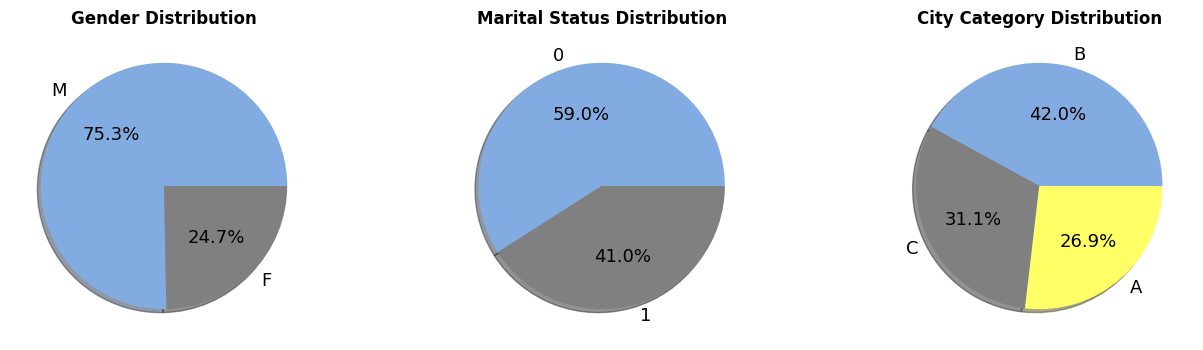

In [ ]:
fig = plt.figure(figsize=(16,4))

color_map = ["#82ABE1", "#808080",'#FFFF66']
plt.subplot(1,3,1)
plt.pie(df['Gender'].value_counts().values, labels = df['Gender'].value_counts().index,autopct = '%.1f%%',
        shadow = True,colors=color_map,textprops={'fontsize': 13, 'color': 'black'})
plt.title("Gender Distribution", fontweight='bold')

plt.subplot(1,3,2)
plt.pie(df['Marital_Status'].value_counts().values, labels = df['Marital_Status'].value_counts().index,autopct = '%.1f%%',
        shadow = True,colors=color_map,textprops={'fontsize': 13, 'color': 'black'})
plt.title("Marital Status Distribution", fontweight='bold')

plt.subplot(1,3,3)
plt.pie(df['City_Category'].value_counts().values, labels = df['City_Category'].value_counts().index,autopct = '%.1f%%',
        shadow = True,colors=color_map,textprops={'fontsize': 13, 'color': 'black'})
plt.title("City Category Distribution", fontweight='bold')

plt.show()

**2. Detect Null values & Outliers (using boxplot, “describe” method by checking the difference between mean and median, isnull etc.)**

In [ ]:
# Comparison between mean and median (50%)
df.describe().loc[['mean','50%']]

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
mean,1.003029e+06,8.076707,0.409653,5.40427,9263.968713
50%,1.003077e+06,7.000000,0.000000,5.00000,8047.000000


In [ ]:
# Missing values (Null Values) check at column level
df.isna().sum() # Dataset doesn't contain any null values

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

**Univariate Analysis**

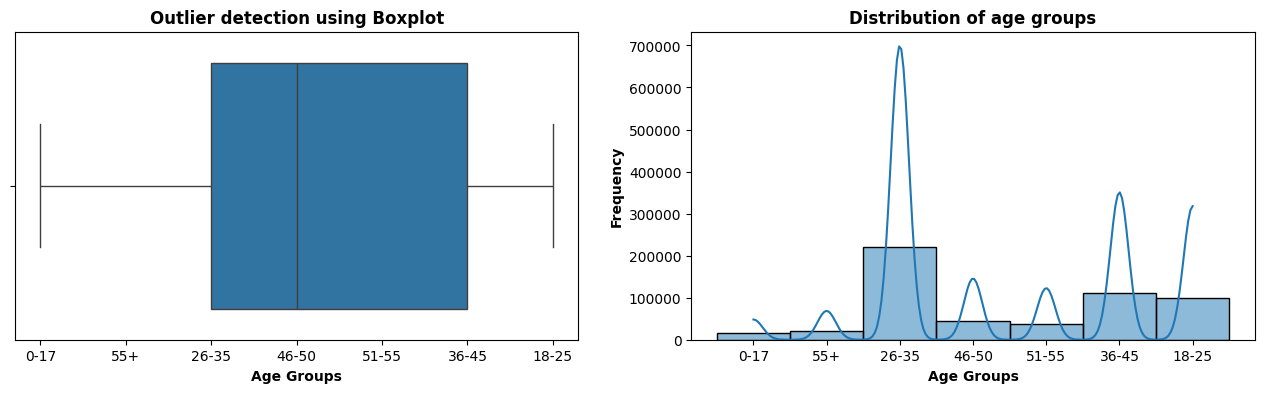

In [ ]:
# detecting outliers using Age
fig = plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
sns.boxplot(data=df['Age'],orient = 'h')
plt.xlabel("Age Groups",fontweight = 'bold')
plt.title('Outlier detection using Boxplot',fontweight = 'bold')

plt.subplot(1,2,2)
sns.histplot(data=df['Age'],kde=True)
plt.xlabel("Age Groups",fontweight = 'bold')
plt.ylabel("Frequency",fontweight = 'bold')
plt.title('Distribution of age groups',fontweight = 'bold')

plt.show() # There are no outliers and the data is not normal

**Insights**

*   As seen above, the Age group of customers are not normally distributed.

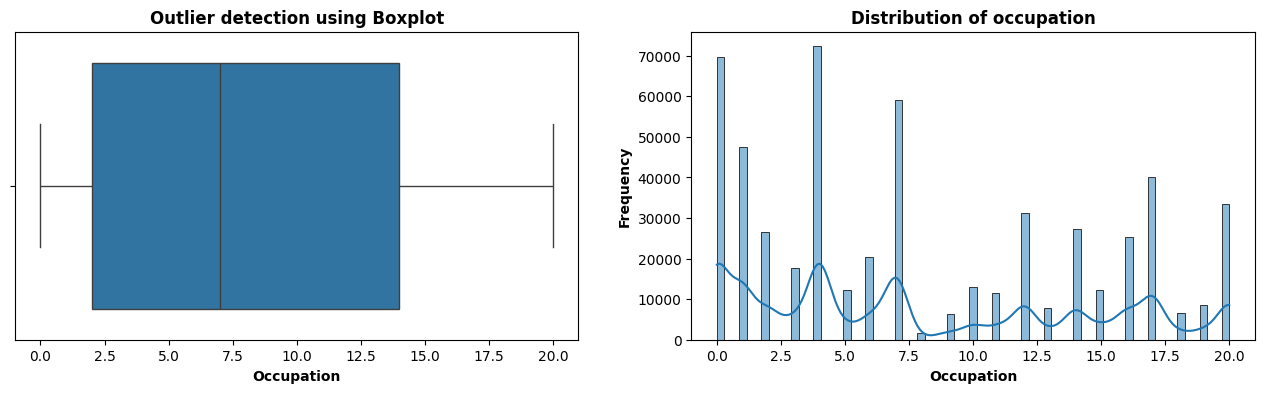

In [ ]:
# detecting outliers using Occupation
fig = plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
sns.boxplot(data=df['Occupation'],orient = 'h')
plt.xlabel("Occupation",fontweight = 'bold')
plt.title('Outlier detection using Boxplot',fontweight = 'bold')

plt.subplot(1,2,2)
sns.histplot(data=df['Occupation'],kde=True)
plt.xlabel("Occupation",fontweight = 'bold')
plt.ylabel("Frequency",fontweight = 'bold')
plt.title('Distribution of occupation',fontweight = 'bold')

plt.show() # There are no outliers and the data is not normal

**Insights**

*   As seen above, the occupation of customers are not normally distributed.

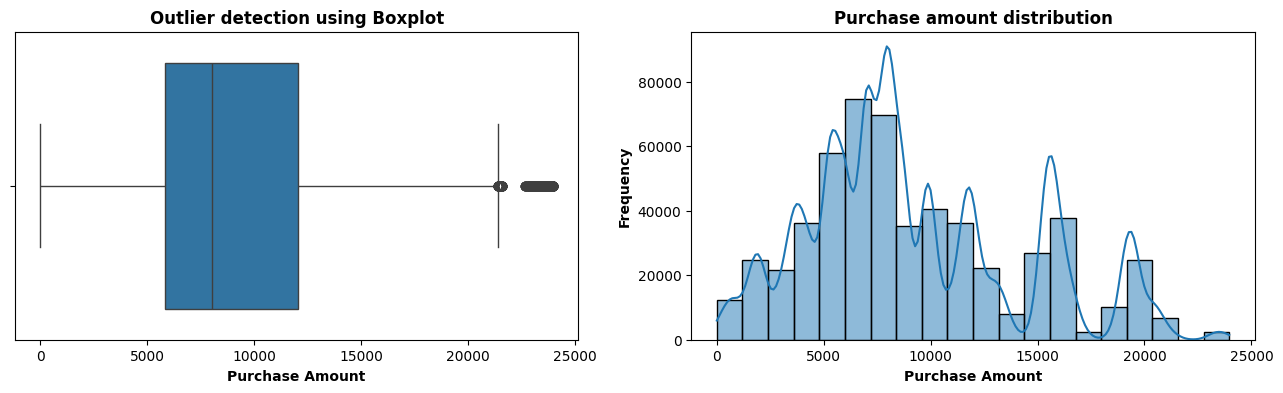

In [ ]:
# detecting outliers using Purchase
fig = plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
sns.boxplot(data=df['Purchase'],orient = 'h')
plt.xlabel("Purchase Amount",fontweight = 'bold')
plt.title('Outlier detection using Boxplot',fontweight = 'bold')

plt.subplot(1,2,2)
sns.histplot(data=df['Purchase'],kde=True,bins=20)
plt.xlabel('Purchase Amount',fontweight = 'bold')
plt.ylabel('Frequency',fontweight = 'bold')
plt.title('Purchase amount distribution',fontweight = 'bold')

plt.show() # We can see the outliers in the boxplot and the data is not normal

In [ ]:
Q1_purchase = df['Purchase'].quantile(0.25)
Q3_purchase = df['Purchase'].quantile(0.75)
IQR = Q3_purchase - Q1_purchase
print(f'25th percentile {Q1_purchase}')
print(f'75th percentile {Q3_purchase}')
print(f'IQR value {IQR}')

25th percentile 5823.0
75th percentile 12054.0
IQR value 6231.0


In [ ]:
Outliers = Q3_purchase + (1.5 * IQR)
Outliers

21400.5

In [ ]:
df[df['Purchase'] > Outliers] # These are the outliers customers

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
343,1000058,P00117642,M,26-35,2,B,3,0,10,23603
375,1000062,P00119342,F,36-45,3,A,1,0,10,23792
652,1000126,P00087042,M,18-25,9,B,1,0,10,23233
736,1000139,P00159542,F,26-35,20,C,2,0,10,23595
1041,1000175,P00052842,F,26-35,2,B,1,0,10,23341
...,...,...,...,...,...,...,...,...,...,...
544488,1005815,P00116142,M,26-35,20,B,1,0,10,23753
544704,1005847,P00085342,F,18-25,4,B,2,0,10,23724
544743,1005852,P00202242,F,26-35,1,A,0,1,10,23529
545663,1006002,P00116142,M,51-55,0,C,1,1,10,23663


In [ ]:
len(df[df['Purchase'] > Outliers]) # Total outlier customers

2677

In [ ]:
df[df['Purchase'] > Outliers].Purchase.min(), df[df['Purchase'] > Outliers].Purchase.max()

(21401, 23961)

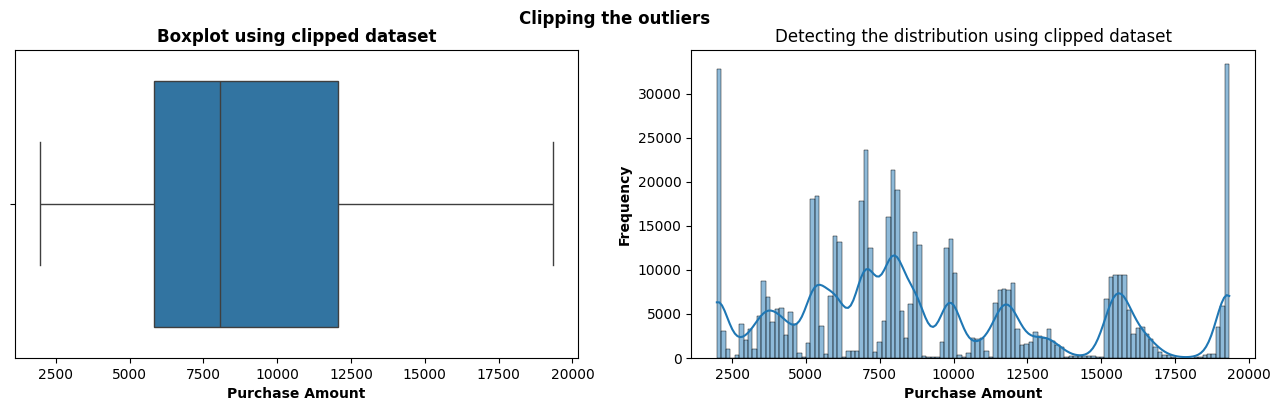

In [ ]:
# Clipped Boxplot of 5 percentile and 95 percentile using Purchase
C_5 = df['Purchase'].quantile(0.05)
C_95 = df['Purchase'].quantile(0.95)
Clipped_data = np.clip(np.array(df['Purchase']),C_5,C_95) # clipped array

fig = plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
sns.boxplot(data=Clipped_data,orient = 'h')
plt.xlabel('Purchase Amount',fontweight = 'bold')
plt.title('Boxplot using clipped dataset',fontweight = 'bold')

plt.subplot(1,2,2)
sns.histplot(data=Clipped_data,kde=True)
plt.xlabel('Purchase Amount',fontweight = 'bold')
plt.ylabel('Frequency',fontweight = 'bold')
plt.title('Detecting the distribution using clipped dataset')

fig.suptitle('Clipping the outliers',fontweight = 'bold')
plt.show()

**Insights**

*   As seen above, the purchase amount of customers are not normally distributed even after clipped the dataset.

**3. Data Exploration**

    1. What products are different age groups buying
    2. Is there a relationship between age, marital status, and the amount spent?
    3. Are there preferred product categories for different genders?

In [ ]:
Top_5_product_cat = df['Product_Category'].value_counts().head().reset_index().rename({'index':'Product_Category','Product_Category':'Count'},axis=1)
df_top_5_p_cat = df[df['Product_Category'].isin(list(Top_5_product_cat['Product_Category']))]
print(Top_5_product_cat)

   Product_Category   Count
0                 5  150933
1                 1  140378
2                 8  113925
3                11   24287
4                 2   23864


**Bivariate Analysis**

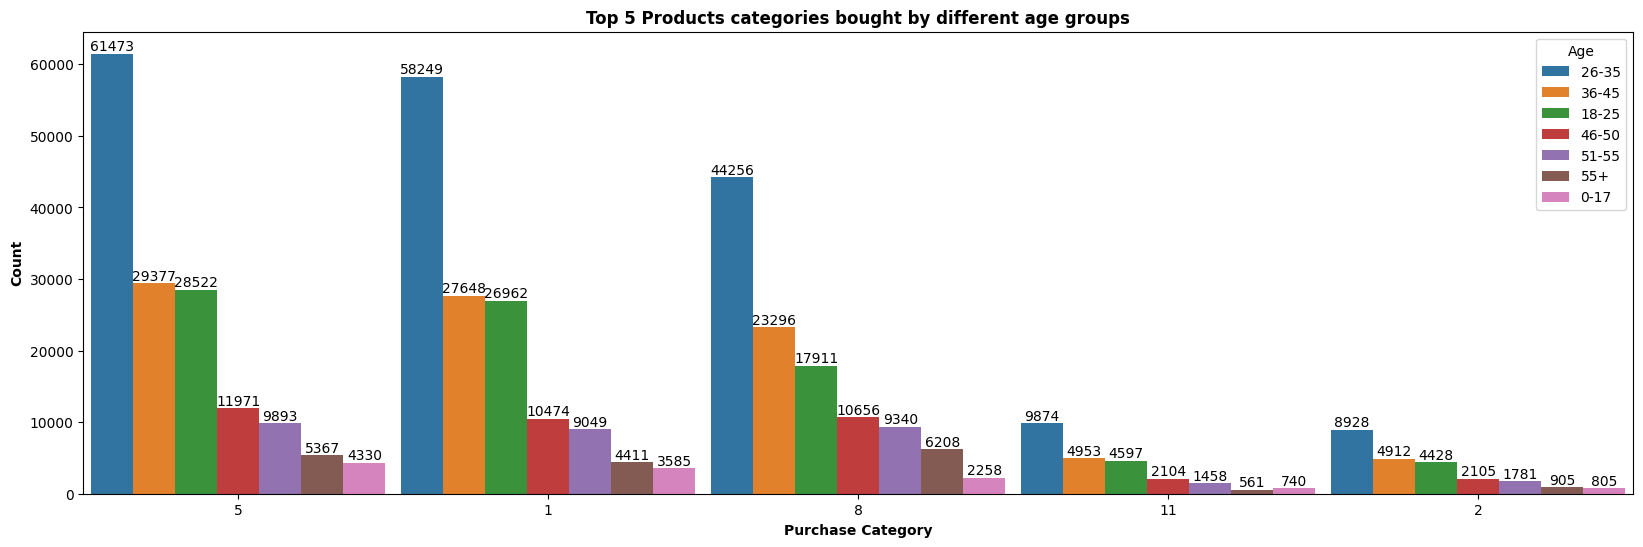

In [ ]:
fig = plt.figure(figsize=(20,6))
xy =sns.countplot(data=df_top_5_p_cat, x = 'Product_Category',order = [5,1,8,11,2],hue = 'Age',hue_order = ['26-35','36-45','18-25','46-50','51-55','55+','0-17'],width=0.95)
for i in xy.containers:
    xy.bar_label(i)
plt.xlabel('Purchase Category',fontweight = 'bold')
plt.ylabel('Count',fontweight = 'bold')
plt.title('Top 5 Products categories bought by different age groups',fontweight = 'bold')
plt.show()

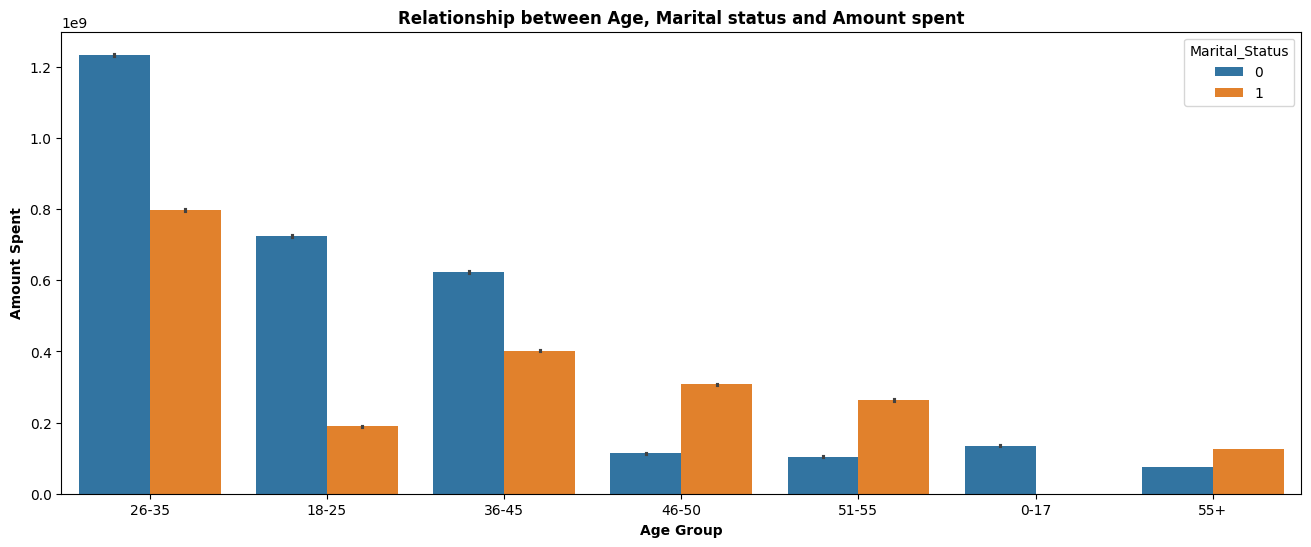

In [ ]:
fig = plt.figure(figsize=(16,6))
sns.barplot(data=df, x='Age',y='Purchase',hue='Marital_Status',estimator='sum',order = ['26-35','18-25','36-45','46-50','51-55','0-17','55+'])
plt.xlabel("Age Group",fontweight='bold')
plt.ylabel("Amount Spent",fontweight='bold')
plt.title('Relationship between Age, Marital status and Amount spent',fontweight = 'bold')
plt.show()

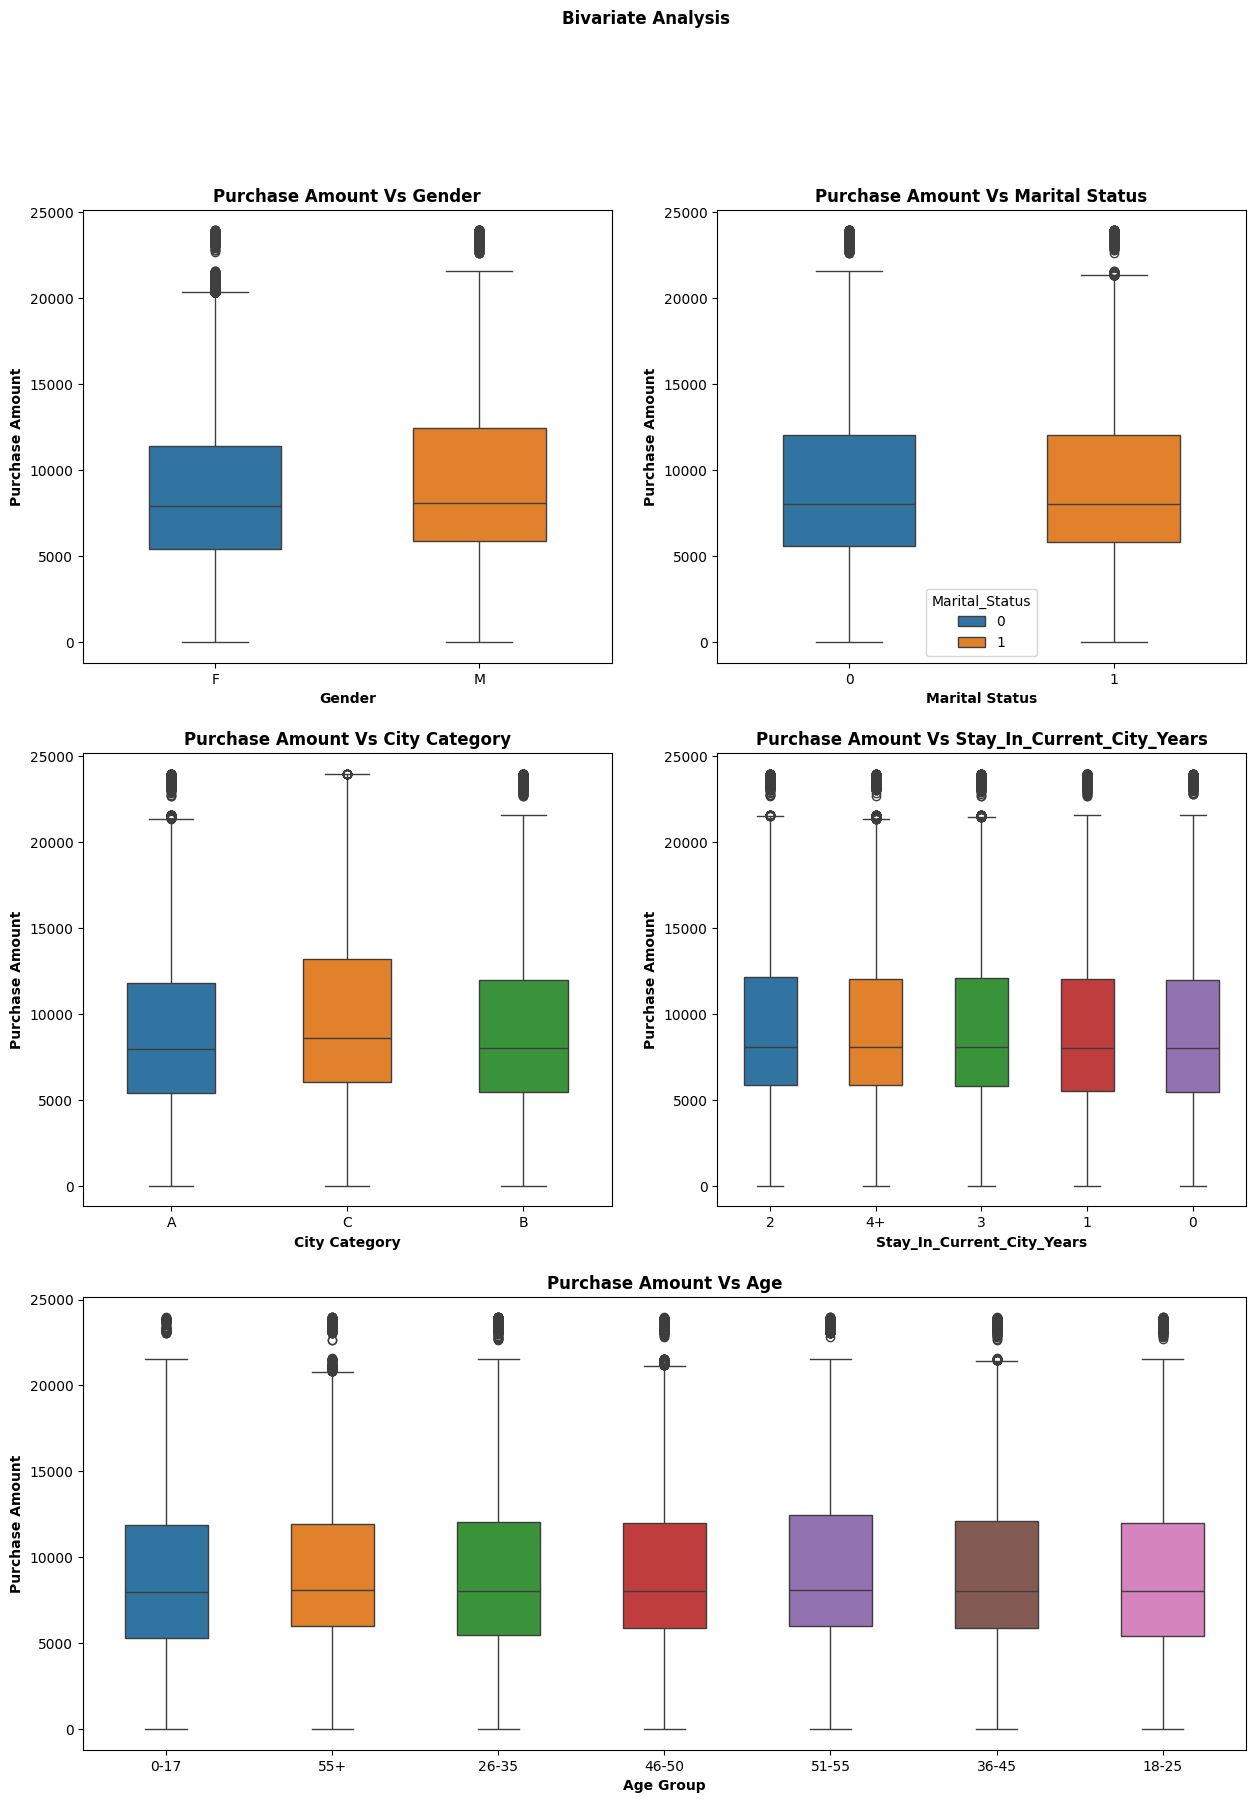

In [ ]:
fig = plt.figure(figsize=(15,20))

plt.subplot(3,2,1)
sns.boxplot(data=df, x='Gender',y='Purchase',hue= 'Gender',width = 0.5)
plt.xlabel("Gender",fontweight='bold')
plt.ylabel("Purchase Amount",fontweight='bold')
plt.title('Purchase Amount Vs Gender',fontweight = 'bold')

plt.subplot(3,2,2)
sns.boxplot(data=df, x='Marital_Status',y='Purchase',hue= 'Marital_Status',width = 0.5)
plt.xlabel("Marital Status",fontweight='bold')
plt.ylabel("Purchase Amount",fontweight='bold')
plt.title('Purchase Amount Vs Marital Status',fontweight = 'bold')

plt.subplot(3,2,3)
sns.boxplot(data=df, x='City_Category',y='Purchase',hue= 'City_Category',width = 0.5)
plt.xlabel("City Category",fontweight='bold')
plt.ylabel("Purchase Amount",fontweight='bold')
plt.title('Purchase Amount Vs City Category',fontweight = 'bold')

plt.subplot(3,2,4)
sns.boxplot(data=df, x='Stay_In_Current_City_Years',y='Purchase',hue= 'Stay_In_Current_City_Years',width = 0.5)
plt.xlabel("Stay_In_Current_City_Years",fontweight='bold')
plt.ylabel("Purchase Amount",fontweight='bold')
plt.title('Purchase Amount Vs Stay_In_Current_City_Years',fontweight = 'bold')

plt.subplot(3,1,3)
sns.boxplot(data=df, x='Age',y='Purchase',hue= 'Age',width = 0.5)
plt.xlabel("Age Group",fontweight='bold')
plt.ylabel("Purchase Amount",fontweight='bold')
plt.title('Purchase Amount Vs Age',fontweight = 'bold')

fig.suptitle('Bivariate Analysis',fontweight = 'bold')
plt.show()

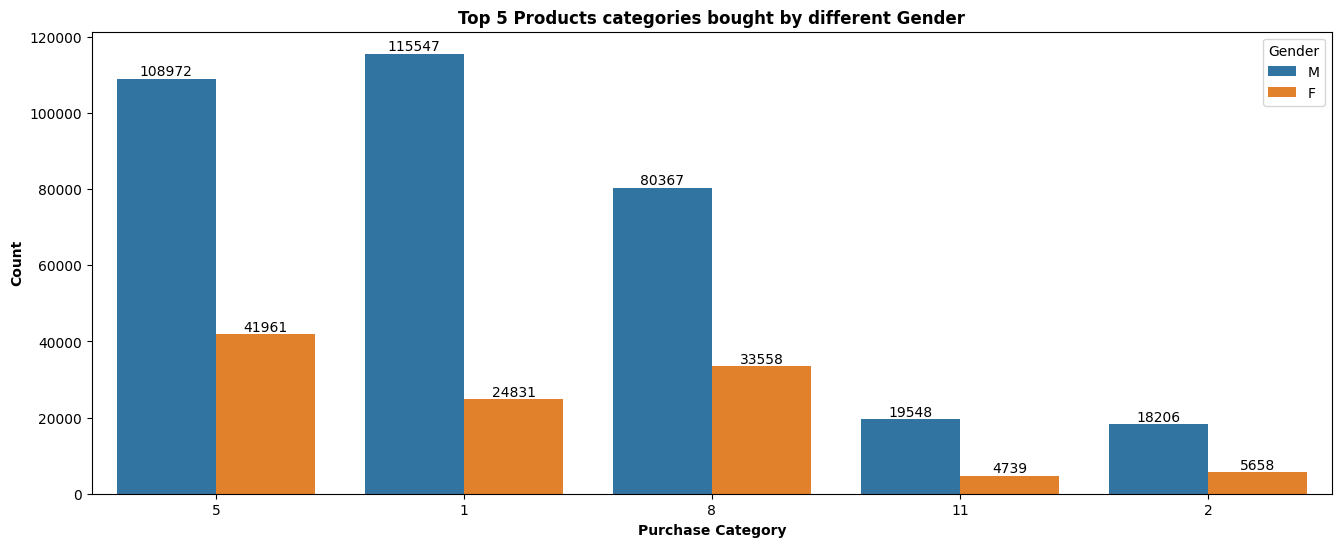

In [ ]:
fig = plt.figure(figsize=(16,6))
xy = sns.countplot(data=df_top_5_p_cat, x = 'Product_Category',hue = 'Gender',order = [5,1,8,11,2], hue_order = ['M','F'])

for i in xy.containers:
    xy.bar_label(i)

plt.xlabel('Purchase Category',fontweight = 'bold')
plt.ylabel('Count',fontweight = 'bold')
plt.title('Top 5 Products categories bought by different Gender',fontweight = 'bold')
plt.show()

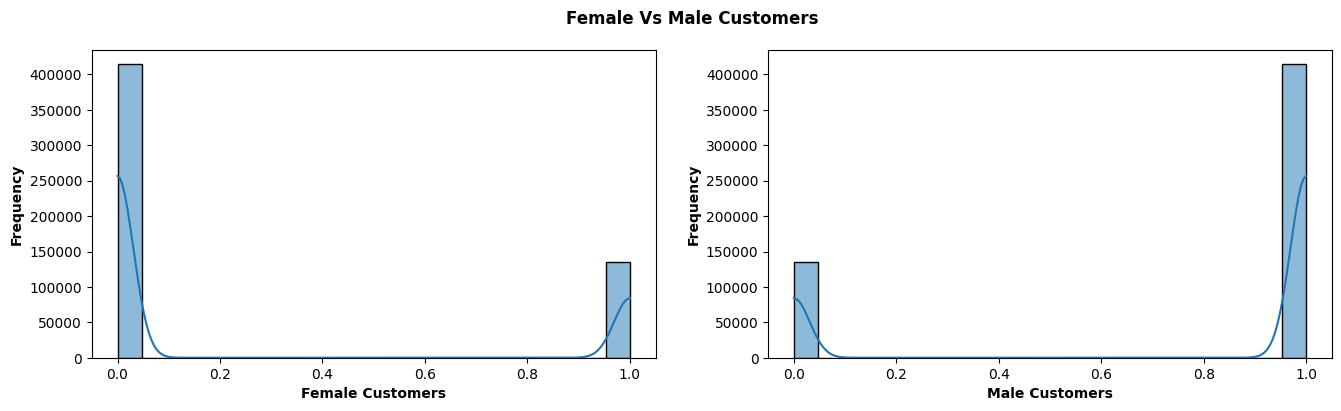

In [ ]:
fig = plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
sns.histplot(data=df['Gender']=='F',kde=True)
plt.xlabel('Female Customers',fontweight = 'bold')
plt.ylabel('Frequency',fontweight = 'bold')

plt.subplot(1,2,2)
sns.histplot(data=df['Gender']=='M',kde=True)
plt.xlabel('Male Customers',fontweight = 'bold')
plt.ylabel('Frequency',fontweight = 'bold')

fig.suptitle('Female Vs Male Customers',fontweight = 'bold')
plt.show()

**Insights**

*   As seen above, the purchase amount for both the genders is not normally distributed.

*   Top 5 product categories are 5, 1, 8, 11 and 2. In all these categories, male customers were dominated/bought significantly more than female customers.

*   Top 5 product categories are 5, 1, 8, 11 and 2. In all these categories, the customers who are in age group 26-35, 36-45 and 18-25 are dominated on Black Friday sales.

**Multivariate Analysis**

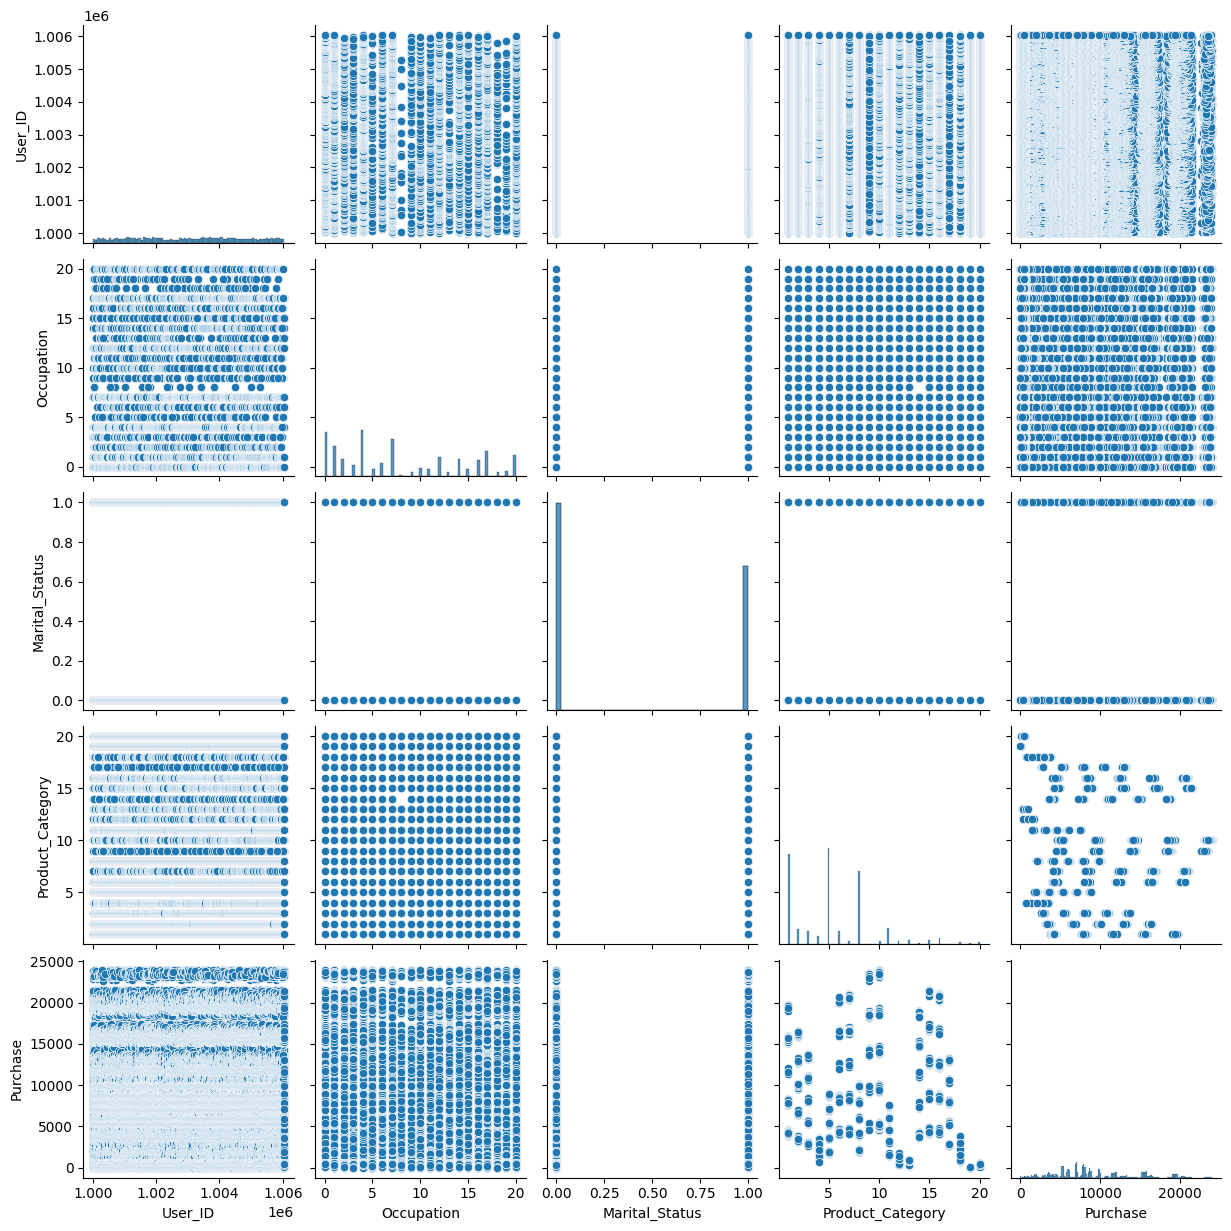

In [ ]:
sns.pairplot(df)

In [ ]:
df.corr()

<ipython-input-137-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,User_ID,Occupation,Marital_Status,Product_Category,Purchase
User_ID,1.000000,-0.023971,0.020443,0.003825,0.004716
Occupation,-0.023971,1.000000,0.024280,-0.007618,0.020833
Marital_Status,0.020443,0.024280,1.000000,0.019888,-0.000463
Product_Category,0.003825,-0.007618,0.019888,1.000000,-0.343703
Purchase,0.004716,0.020833,-0.000463,-0.343703,1.000000


<ipython-input-138-61da65fb820a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='crest')


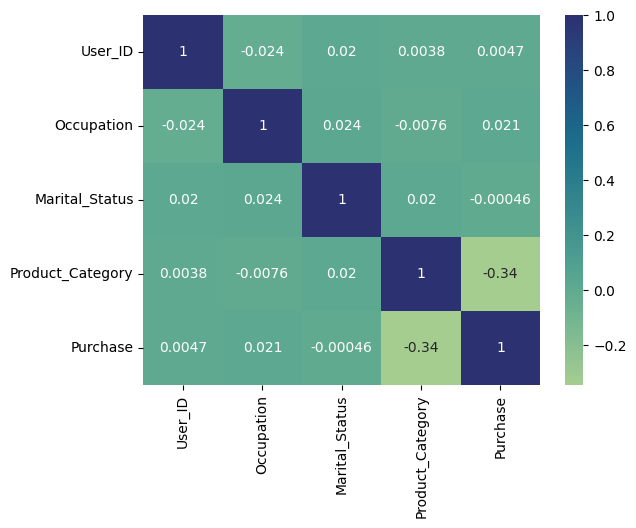

In [ ]:
sns.heatmap(df.corr(),annot=True,cmap='crest')
plt.show()

**Insights**

*   It's surprise that there is no correlation between variables in the dataset.

**3. Do some data exploration steps like:**

    1. Tracking the amount spent per transaction of all the 50 million female customers, and all the 50 million male customers, calculate the average, and conclude the results.
    2. Inference after computing the average female and male expenses.
    3. Use the sample average to find out an interval within which the population average will lie. Using the sample of female customers you will calculate the interval within which the average spending of 50 million male and female customers may lie.

In [ ]:
# Total amount spent by Male Vs Female
Tot_female_expenses = round(df[df.Gender == 'F'].Purchase.sum(),2)
print(f'On an average female customers are spending amount {Tot_female_expenses} per transactiom')
Tot_male_expenses = round(df[df.Gender == 'M'].Purchase.sum(),2)
print(f'On an average male customers are spending amount {Tot_male_expenses} per transactiom')

On an average female customers are spending amount 1186232642 per transactiom
On an average male customers are spending amount 3909580100 per transactiom


In [ ]:
round((Tot_male_expenses/Tot_female_expenses),1) # Total amount spent by men is 3 times higher than women

3.3

In [ ]:
Male_customers = df[df.Gender=='M'].count().values[0]
Female_customers = df[df.Gender=='F'].count().values[0]
Male_customers,Female_customers

(414259, 135809)

In [ ]:
round((Male_customers/Female_customers),2) # Male customers are 3 times higher than female customers

3.05

In [ ]:
# Amount spent per transaction by female customers
Avg_female_expenses = round(df[df.Gender == 'F'].Purchase.mean(),2)
print(f'On an average female customers are spending amount {Avg_female_expenses} per transactiom')

# Amount spent per transaction by male customers
Avg_male_expenses = round(df[df.Gender == 'M'].Purchase.mean(),2)
print(f'On an average male customers are spending amount {Avg_male_expenses} per transactiom')

On an average female customers are spending amount 8734.57 per transactiom
On an average male customers are spending amount 9437.53 per transactiom


In [ ]:
Diff_in_expenses = round((Avg_male_expenses - Avg_female_expenses),2)
print(f'Conclusion : On an average male customers are spending amount {Diff_in_expenses} more than female customers')

Conclusion : On an average male customers are spending amount 702.96 more than female customers


**Insights**

*   The total purchase amount and number of transactions made by male customers was 3 times more than female customers indicating that they had a more significant impact on the Black Friday sales.
*   The average purchase amount per transaction was slightly higher (703) for male customers than female customers (9438 vs 8735).

**4. Use the Central limit theorem to compute the interval. Change the sample size to observe the distribution of the mean of the expenses by female and male customers.**

    *   The interval that you calculated is called Confidence Interval. The width of the interval is mostly decided by the business: Typically 90%, 95%, or 99%. Play around with the width parameter and report the observations.

Sample size 300, 90% confidence interval the female customers may lie between (8281.85, 9187.29)
Sample size 300, 90% confidence interval the male customers may lie between (8953.95, 9921.11)
Sample size 300, 95% confidence interval the female customers may lie between (8195.12, 9274.02)
Sample size 300, 95% confidence interval the male customers may lie between (8861.31, 10013.75)
Sample size 300, 99% confidence interval the female customers may lie between (8025.61, 9443.53)
Sample size 300, 99% confidence interval the male customers may lie between (8680.24, 10194.82)
Sample size 3000, 90% confidence interval the female customers may lie between (8591.41, 8877.73)
Sample size 3000, 90% confidence interval the male customers may lie between (9284.61, 9590.45)
Sample size 3000, 95% confidence interval the female customers may lie between (8563.98, 8905.16)
Sample size 3000, 95% confidence interval the male customers may lie between (9255.31, 9619.75)
Sample size 3000, 99% confidence i

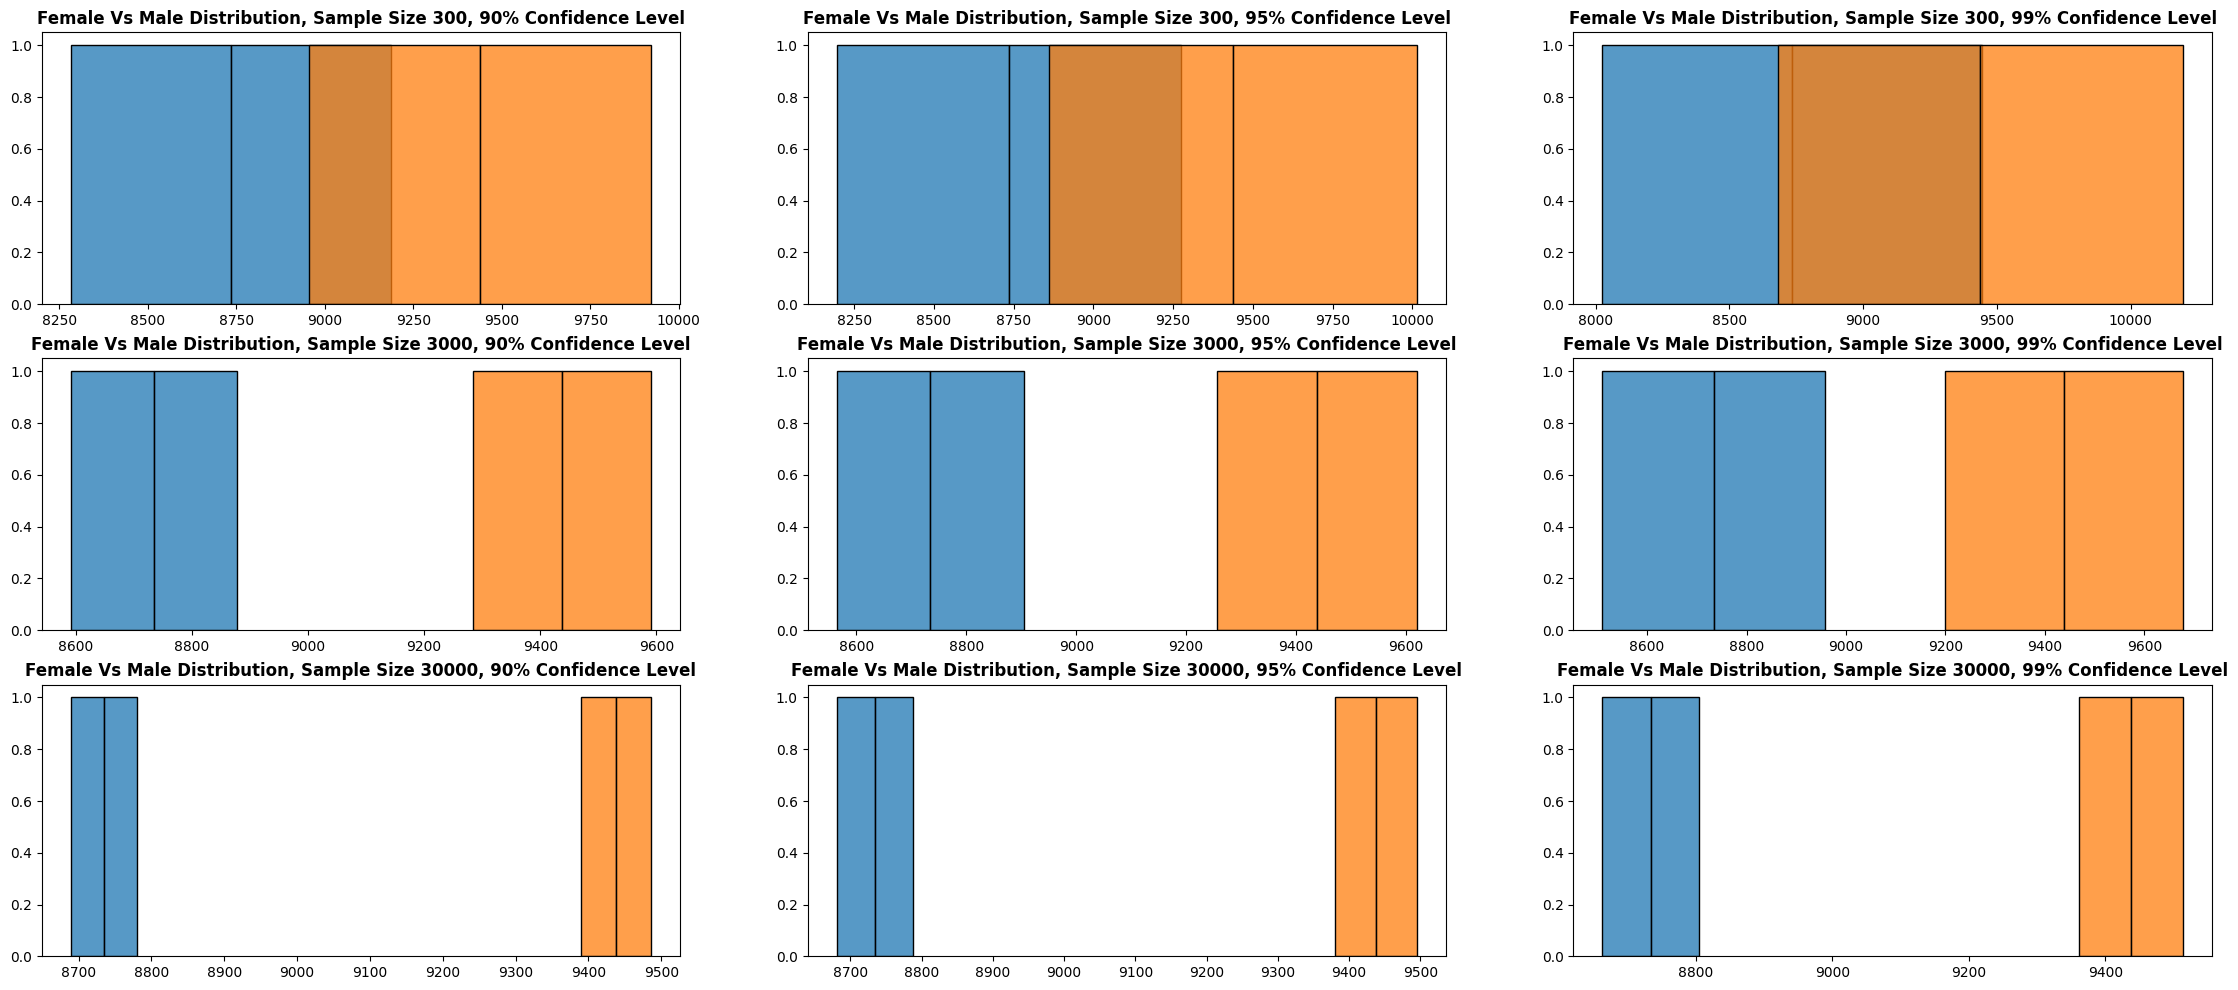

In [ ]:
# Male Vs Female
Std_female_expenses = round(df[df.Gender == 'F'].Purchase.std(),2)
Std_male_expenses = round(df[df.Gender == 'M'].Purchase.std(),2)

# Using Central Limit Theorem method
sample_size = [300,3000,30000]
confidence_level = [0.90,0.95,0.99]
plt_pos = 1

fig = plt.figure(figsize=(28,12))

for n in sample_size:
    for k in confidence_level:
        low_f,high_f = norm.interval(confidence=k,loc=Avg_female_expenses,scale=Std_female_expenses/n ** 0.5)
        print(f'Sample size {n}, {int(k*100)}% confidence interval the female customers may lie between ({round(low_f,2)}, {round(high_f,2)})')
        female= [low_f,high_f]

        low_m,high_m = norm.interval(confidence=k,loc=Avg_male_expenses,scale=Std_male_expenses/n ** 0.5)
        print(f'Sample size {n}, {int(k*100)}% confidence interval the male customers may lie between ({round(low_m,2)}, {round(high_m,2)})')
        male= [low_m,high_m]

        plt.subplot(3,3,plt_pos)
        sns.histplot(female)
        sns.histplot(male)
        plt_pos+=1
        plt.ylabel('')
        plt.title(f'Female Vs Male Distribution, Sample Size {n}, {int(k*100)}% Confidence Level',fontweight='bold')
plt.show()

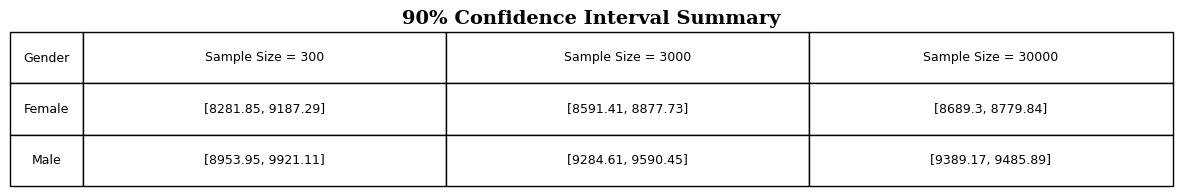

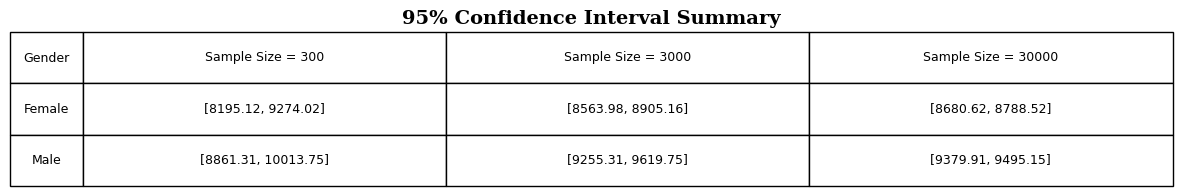

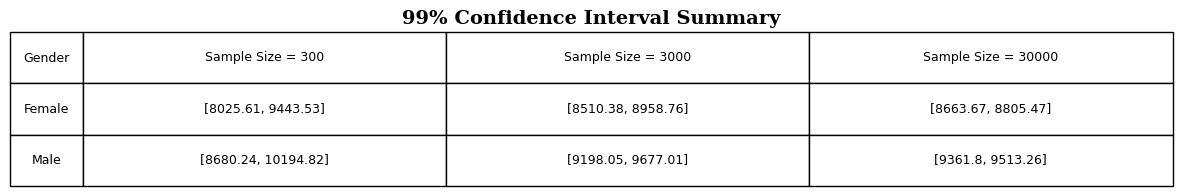

In [ ]:
for k in confidence_level:
    female_sample_collection = ['Female']
    male_sample_collection = ['Male']
    for n in sample_size:
        low,high = norm.interval(confidence=k,loc=Avg_female_expenses,scale=Std_female_expenses/n ** 0.5)
        female_sample_collection.append([round(low,2),round(high,2)])

        low_1,high_1 = norm.interval(confidence=k,loc=Avg_male_expenses,scale=Std_male_expenses/n ** 0.5)
        male_sample_collection.append([round(low_1,2),round(high_1,2)])

    fig = plt.figure(figsize=(15,2))
    ci_info = [female_sample_collection,male_sample_collection]

    #plotting the table
    table = plt.table(cellText = ci_info, cellLoc='center',
                        colLabels =['Gender','Sample Size = 300','Sample Size = 3000','Sample Size = 30000'],
                        colLoc = 'center',colWidths = [0.05,0.25,0.25,0.25],bbox =[0, 0, 1, 1])

    table.set_fontsize(14)
    plt.axis('off')
    plt.title(f"{int(k*100)}% Confidence Interval Summary",{'font':'serif', 'size':14,'weight':'bold'})


**Insights**

*   The analysis highlights the importance of sample size in estimating population parameters. It suggests that as the sample size increases, the confidence intervals become narrower and more precise. In business, this implies that larger sample sizes can provide more reliable insights and estimates.

*   From the above analysis, we can clearly see that the confidence interval do not overlap except for the Sample Size of 300. This means that there is a statistically significant difference between the average spending per transaction for men and women within the given samples as the sample size increases.

*   We are 95% confident that the true population average amount for males falls between 9380 and 9495, and for females, it falls between 8680 and 8788.

*   Men tend to spend more money per transaction on average than women, as the upper bounds of the confidence intervals for men are consistently higher than women across different sample sizes.

**5. Conclude the results and check if the confidence intervals of average male and female spends are overlapping or not overlapping. How can Walmart leverage this conclusion to make changes or improvements?**

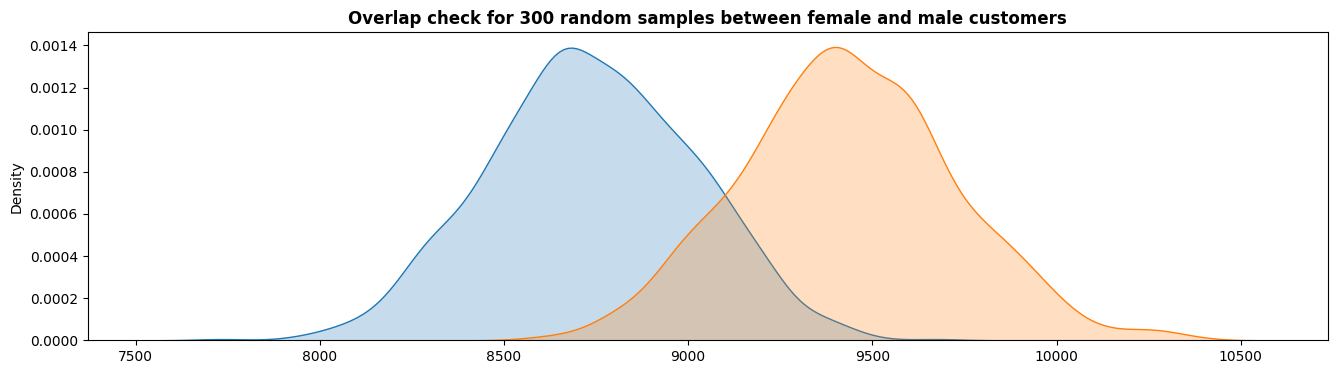

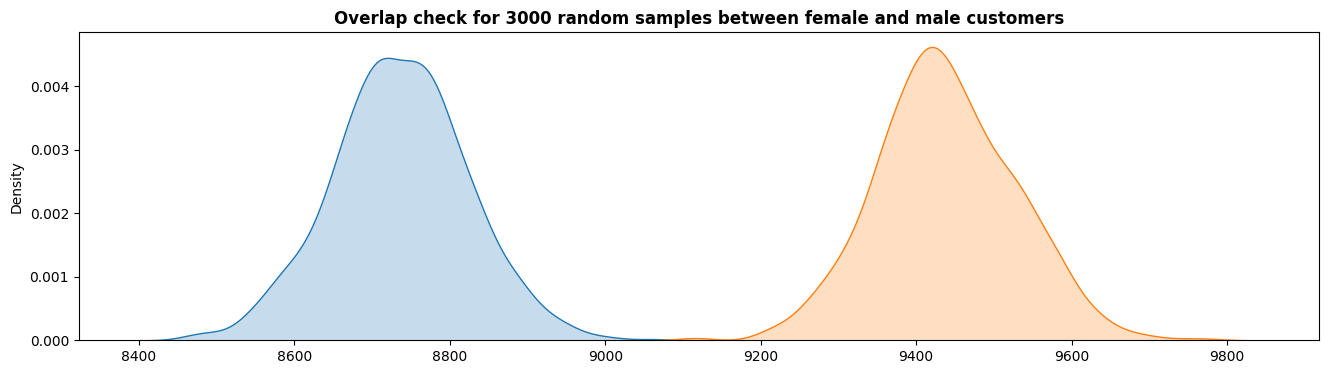

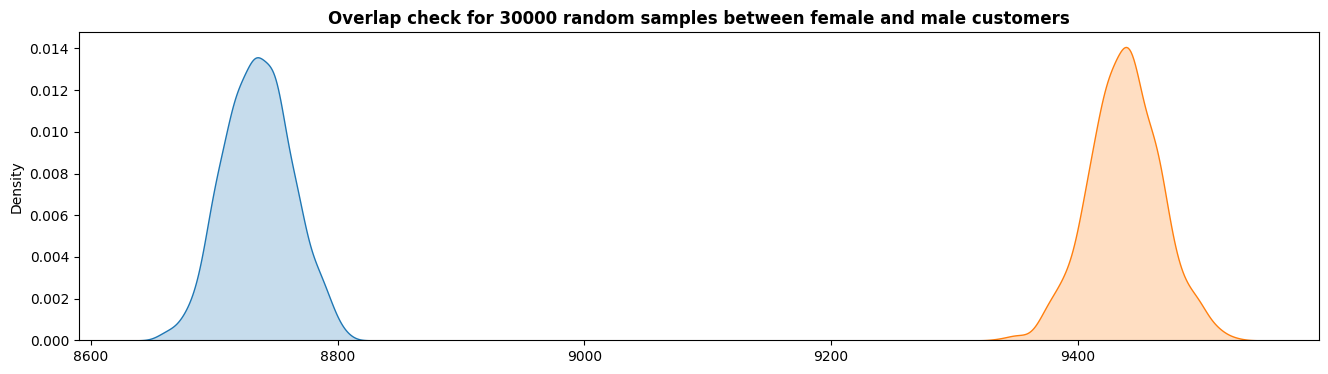

In [ ]:
# Male Vs Female

sample_data_female = df[df.Gender == 'F'].Purchase
sample_data_male = df[df.Gender == 'M'].Purchase

# Using Bootstrap method
for n in sample_size:
    fig = plt.figure(figsize=(16,4))
    btrsp_sample_mean_female=[]
    btrsp_sample_mean_male=[]
    for i in range(1000):
        btrsp_sample=np.random.choice(sample_data_female,size=n)
        btrsp_mean=np.mean(btrsp_sample)
        btrsp_sample_mean_female.append(btrsp_mean)
        btrsp_sample2=np.random.choice(sample_data_male,size=n)
        btrsp_mean2=np.mean(btrsp_sample2)
        btrsp_sample_mean_male.append(btrsp_mean2)
    sns.kdeplot(btrsp_sample_mean_female,fill=True, label ='Female')
    sns.kdeplot(btrsp_sample_mean_male,fill=True, label ='Male')

    plt.title(f'Overlap check for {n} random samples between female and male customers',fontweight='bold')
    plt.show()

**Insights**

*   Since male customers account for a significant portion of Black Friday sales and tend to spend more per transaction on average, Walmart should tailor its marketing strategies and product offerings to incentivize higher spending among male customers while ensuring competitive pricing for female-oriented products.


**6. Perform the same activity for Married vs Unmarried and Age**

*   For Age, you can try bins based on life stages: 0-17, 18-25, 26-35, 36-50, 51+ years.

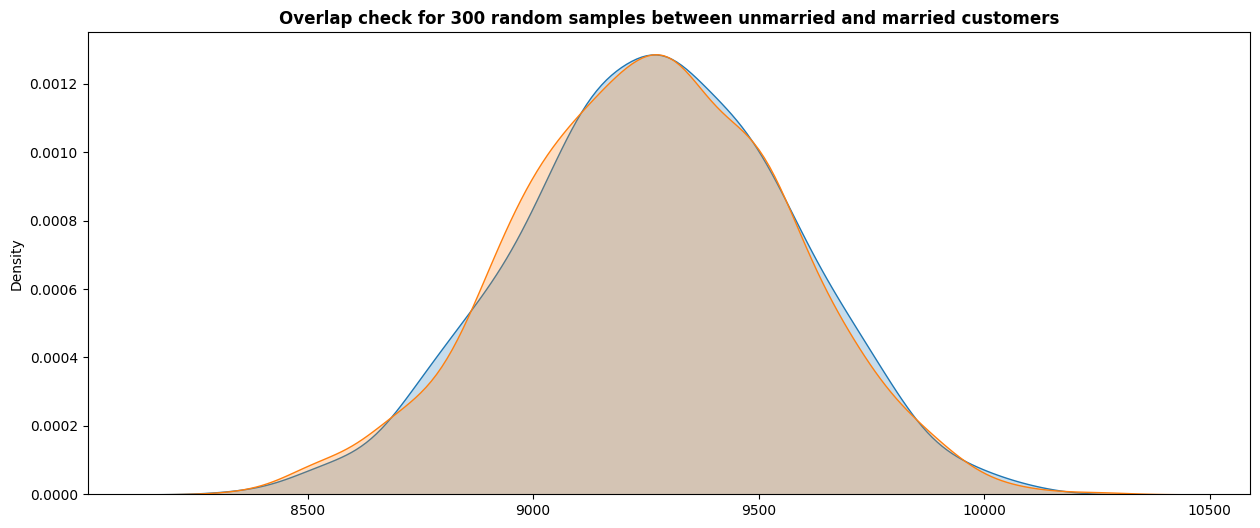

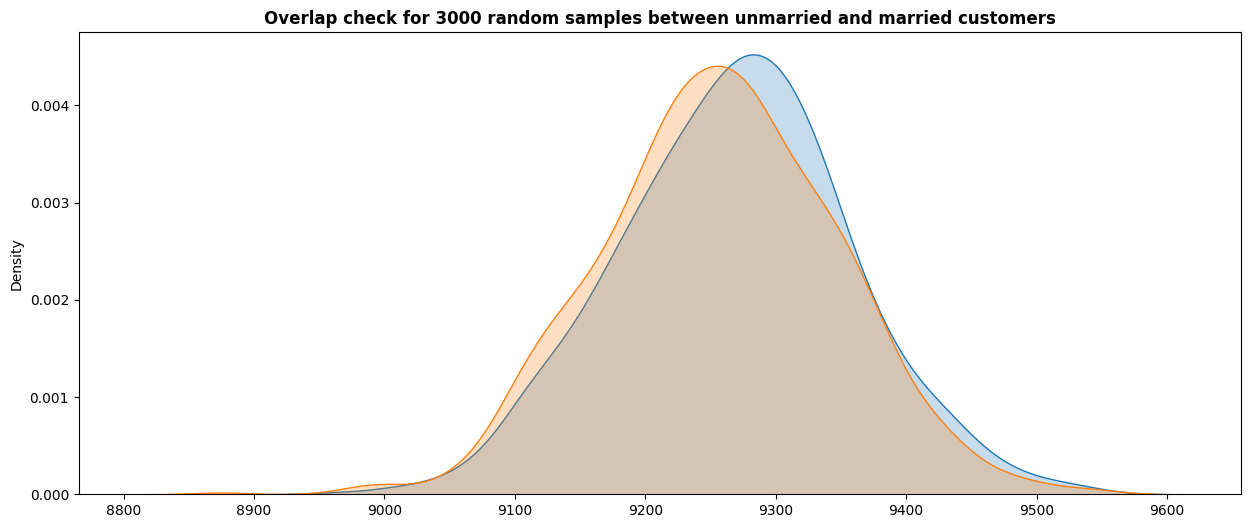

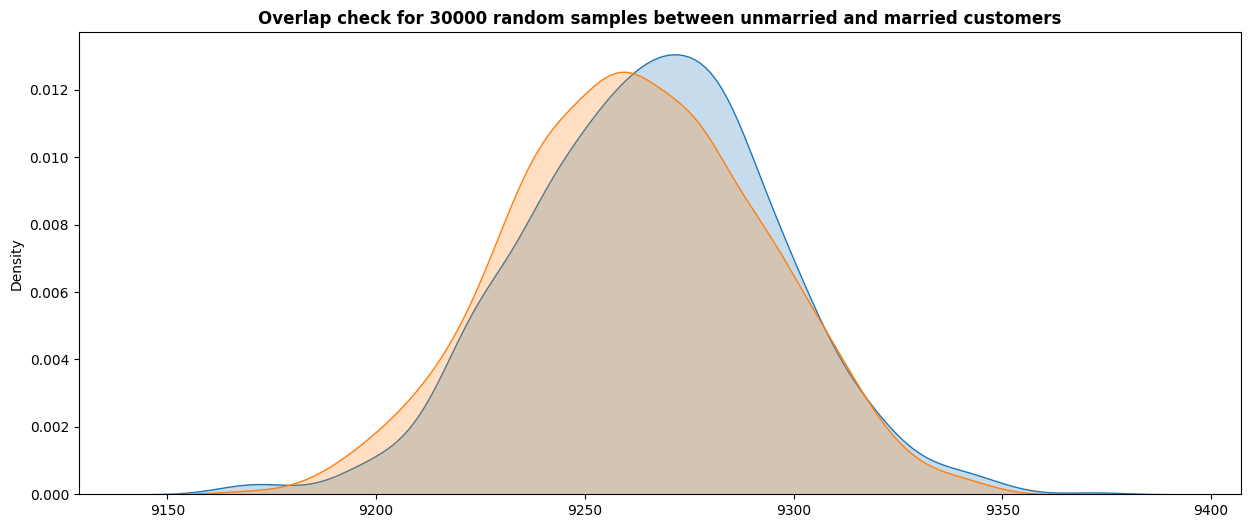

In [ ]:
# Married vs Unmarried

sample_data_unmarried = df[df.Marital_Status == 0].Purchase
sample_data_married = df[df.Marital_Status == 1].Purchase

# Using Bootstrap method
for n in sample_size:
    fig = plt.figure(figsize=(15,6))
    btsrp_sample_mean_unmarried=[]
    btsrp_sample_mean_married=[]
    for i in range(1000):
        btsrp_sample=np.random.choice(sample_data_unmarried,size=n)
        btsrp_mean=np.mean(btsrp_sample)
        btsrp_sample_mean_unmarried.append(btsrp_mean)
        btsrp_sample2=np.random.choice(sample_data_married,size=n)
        btsrp_mean2=np.mean(btsrp_sample2)
        btsrp_sample_mean_married.append(btsrp_mean2)
    sns.kdeplot(btsrp_sample_mean_unmarried,fill=True,label='Unmarried')
    sns.kdeplot(btsrp_sample_mean_married,fill=True,label='Married')

    plt.title(f'Overlap check for {n} random samples between unmarried and married customers',fontweight='bold')
    plt.show()

**Insights**

*   From the above analysis, we can clearly see that the confidence interval overlap for all the tested Sample Sizes. This means that the marital status doesn't have any effect on Black Fridat sales.

In [ ]:
df.groupby(['Age']).agg('sum')['Purchase']

<ipython-input-149-775003426316>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['Age']).agg('sum')['Purchase']


Age
0-17      134913183
18-25     913848675
26-35    2031770578
36-45    1026569884
46-50     420843403
51-55     367099644
55+       200767375
Name: Purchase, dtype: int64

<ipython-input-150-3f79efae2d6a>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Total_age_grp_purchase = df.groupby(['Age']).agg('sum')['Purchase']


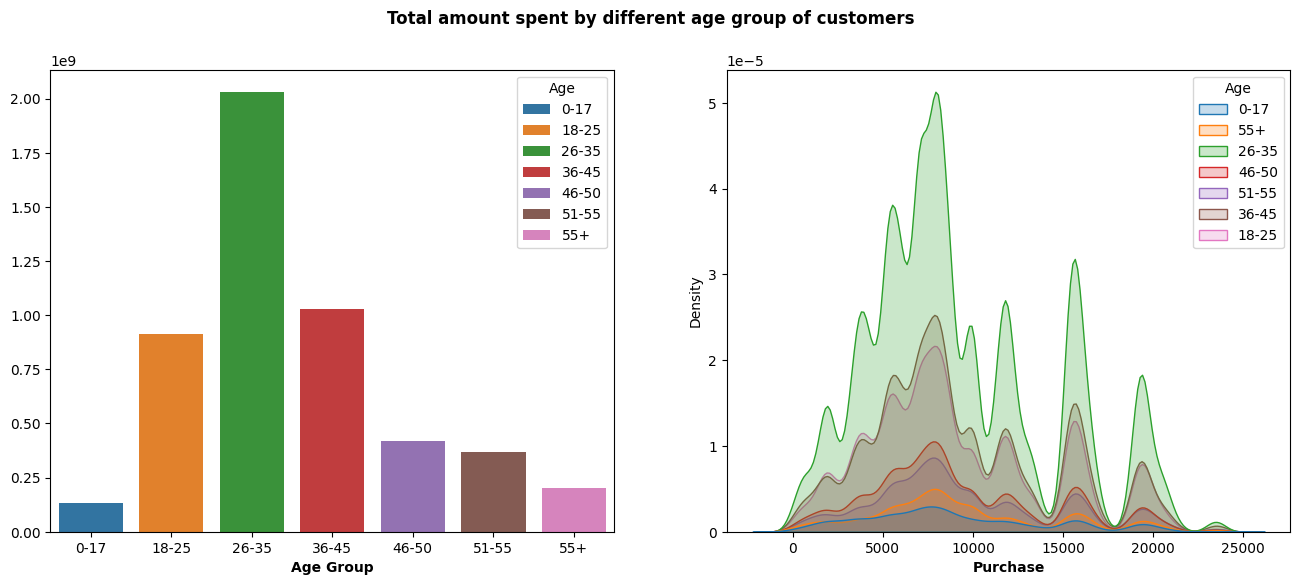

In [ ]:
Total_age_grp_purchase = df.groupby(['Age']).agg('sum')['Purchase']
fig = plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
xy = sns.barplot(x=Total_age_grp_purchase.index,y=Total_age_grp_purchase.values,hue=Total_age_grp_purchase.index,legend = 'full')
plt.xlabel('Age Group',fontweight='bold')

plt.subplot(1,2,2)
sns.kdeplot(data = df, x = 'Purchase', hue = 'Age',fill = True)
plt.xlabel('Purchase',fontweight='bold')
fig.suptitle('Total amount spent by different age group of customers',fontweight='bold')

plt.show()

**Insights**
   
*   The above analysis clearly shows that the age group 26-45 (26-35 and 36-45) 60% of total sales/purchase on Black Friday among those age groups.

*   Age group 0-17 slaes is very less and it's predictable as they're depended on their parents for money.

*   As seen above, the purchase amount for all age groups is not normally distributed

In [ ]:
round(df.groupby(['Age']).agg('mean')['Purchase'],2)

<ipython-input-151-250da0ecedce>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  round(df.groupby(['Age']).agg('mean')['Purchase'],2)


Age
0-17     8933.46
18-25    9169.66
26-35    9252.69
36-45    9331.35
46-50    9208.63
51-55    9534.81
55+      9336.28
Name: Purchase, dtype: float64

**Insights**
   
*   The above analysis clearly shows that the Mean/Average purchase amount for all the age groups are almost similar for randomm sample sizes 300 and 3000. However, we can see the age group 0-17 is significantly less compare to other groups.

*   The customers who are part of age group 51+ are having higher purchase amount per transaction but the total sales is lesser so, Walmart should target them and inprove the sales by implementing a proper strategy.

In [ ]:
df.Age.unique() # Unique age groups in the given dataset

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

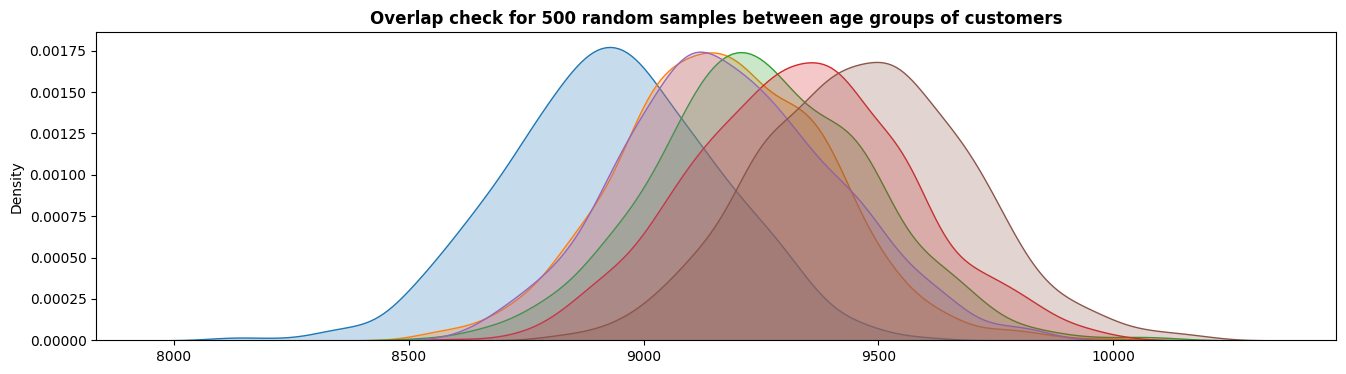

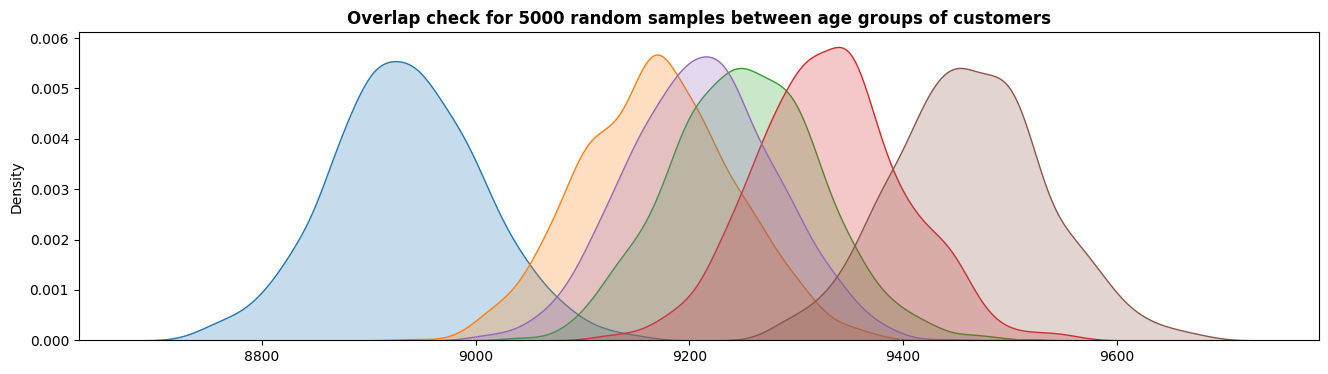

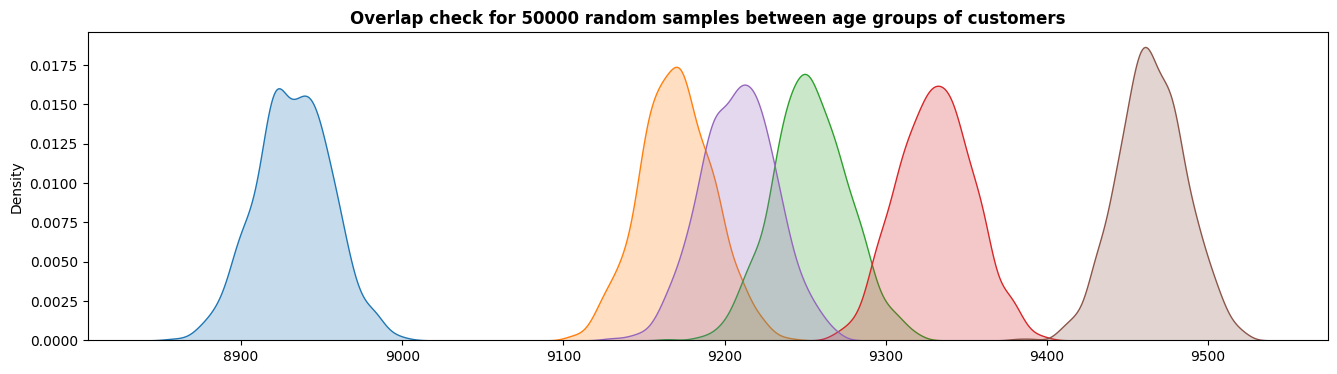

In [ ]:
sample_Age_0_17 = df[df.Age == '0-17'].Purchase
sample_Age_18_25 = df[df.Age == '18-25'].Purchase
sample_Age_26_35 = df[df.Age == '26-35'].Purchase
sample_Age_36_45 = df[df.Age == '36-45'].Purchase
sample_Age_46_50 = df[df.Age == '46-50'].Purchase
sample_Age_51_plus = df[(df.Age == '51-55') | (df.Age == '55+')].Purchase # Combining age groups 51-55 and 55+ together
sample_size = [500,5000,50000]

# Using Bootstrap method
for n in sample_size:
    fig = plt.figure(figsize=(16,4))
    btrsp_sample_Age_0_17=[]
    btrsp_sample_Age_18_25=[]
    btrsp_sample_Age_26_35=[]
    btrsp_sample_Age_36_45=[]
    btrsp_sample_Age_46_50=[]
    btrsp_sample_Age_51_plus=[]

    for i in range(1000):
        btrsp_sample = np.random.choice(sample_Age_0_17,size=n)
        btrsp_mean = np.mean(btrsp_sample)
        btrsp_sample_Age_0_17.append(btrsp_mean)

        btrsp_sample2=np.random.choice(sample_Age_18_25,size=n)
        btrsp_mean2=np.mean(btrsp_sample2)
        btrsp_sample_Age_18_25.append(btrsp_mean2)

        btrsp_sample3=np.random.choice(sample_Age_26_35,size=n)
        btrsp_mean3=np.mean(btrsp_sample3)
        btrsp_sample_Age_26_35.append(btrsp_mean3)

        btrsp_sample4=np.random.choice(sample_Age_36_45,size=n)
        btrsp_mean4=np.mean(btrsp_sample4)
        btrsp_sample_Age_36_45.append(btrsp_mean4)

        btrsp_sample5=np.random.choice(sample_Age_46_50,size=n)
        btrsp_mean5=np.mean(btrsp_sample5)
        btrsp_sample_Age_46_50.append(btrsp_mean5)

        btrsp_sample6=np.random.choice(sample_Age_51_plus,size=n)
        btrsp_mean6=np.mean(btrsp_sample6)
        btrsp_sample_Age_51_plus.append(btrsp_mean6)

    sns.kdeplot(btrsp_sample_Age_0_17, fill=True)
    sns.kdeplot(btrsp_sample_Age_18_25, fill=True)
    sns.kdeplot(btrsp_sample_Age_26_35, fill=True)
    sns.kdeplot(btrsp_sample_Age_36_45, fill=True)
    sns.kdeplot(btrsp_sample_Age_46_50, fill=True)
    sns.kdeplot(btrsp_sample_Age_51_plus, fill=True)

    plt.title(f'Overlap check for {n} random samples between age groups of customers',fontweight='bold')
    plt.show()

**Insights**

*   From the above analysis, we can see that the confidence interval overlap for some of the age groups. We can club the average spending into following age groups -

    1.   0 - 17 - Customers in this age group have the lowest spending per transaction.
    2.   18 - 25, 26 - 35, 46 - 50 - Customers in these age groups have overlapping confidence intervals indicating similar buying characteristics.
    3.   51 - 55 - Customers in this age group have the highest spending per transaction.

**7. Recommendations and action items to Walmart**

*   Knowing that customers in the 0 - 17 age group have the lowest spending per transaction, Walmart can try to increase their spending per transaction by offering them more attractive discounts, coupons, or rewards programs.

*   The customers in the 18 - 25, 26 - 35, 36 - 45 and 46 - 50 age group have the smimilar purchase charecteristics, Walmart can optimize its product selection to cater to the preferences of these age groups. Also, Walmart can use this information to adjust their pricing strategies for different age groups.

*   Recognizing that customers in the 51 - 55 age group have the highest spending per transaction, Walmart can explore opportunities to enhance the shopping experience for this demographic. This might involve offering premium services, personalized recommendations, or loyalty programs that cater to the preferences and spending habits of this age group.

*   Since male customers account for a significant portion of Black Friday sales and tend to spend more per transaction on average, Walmart should tailor its marketing strategies and product offerings to incentivize higher spending among male customers while ensuring competitive pricing for female-oriented products.

*   After Black Friday, walmart should engage with customers who made purchases by sending follow-up emails or offers for related products. This can help increase customer retention and encourage repeat business throughout the holiday season and beyond.